In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import Polygon, Point
from osgeo import gdal
import os
import numpy as np
from scipy.interpolate import griddata
import pandas as  pd
import geopandas as gp
from osgeo import gdal
import os
import DataSets
import matplotlib as mpl
import affine


In [2]:
minX=-45000
maxX=-44200
minY=-69500
maxY=-68700
demDataSetMask = "/data/puma1/scratch/mtngla/dems/Tdx_SRTM_SurfaceSplit.tiff"
raster = DataSets.RasterDataSet(demDataSetMask)
#print(raster)
#print(raster.data)
raster.cutToBbx(minX,maxX,minY,maxY)
#x = [-44300]
#y = [-69400]
#x = [-44500]
#y = [-69000]
#x = [-44600]
#y = [-69000]
x = [-44641]
y = [-68800]
values = raster.getValuesAt(x, y)
#values = raster._getPixel(x[0], y[0])
#values = getValueAt(x[0], y[0], raster.data)
print(values)
#values2=retrieve_pixel_value([x[0], y[0]], raster.data)
#print(values2)

#gt = raster.data.GetGeoTransform()
#pixel, line = world2Pixel(x[0], y[0], gt)
#band = raster.data.GetRasterBand(1)
#print(band.ReadAsArray())
#print(pixel, line)
#value = band.ReadAsArray(pixel, line, 1, 1)[0, 0]
#print(value)

2.0


In [33]:
crs = "+proj=aea +lat_1=25 +lat_2=47 +lat_0=36 +lon_0=85 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
geometry = [Point(xy) for xy in zip(x, y)]
geoDf = gp.GeoDataFrame(crs=crs, geometry=geometry)

[2.0]


<IPython.core.display.Javascript object>


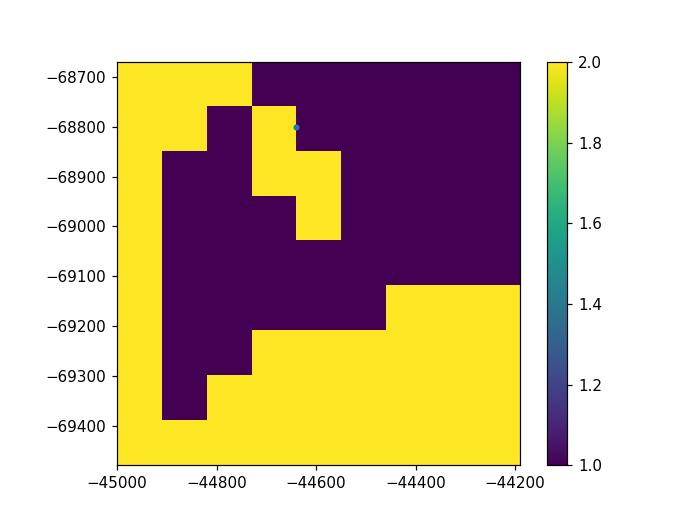

In [34]:
vmem = "/vsimem/tile_%s_%s_%s_%s.tif" % (minX,maxY,maxX, minY)
clipped = rasterio.open(vmem)
band=clipped.read(1)
print(values)
fig, ax = plt.subplots()
show(clipped, transform=clipped.transform, cmap='viridis', ax=ax)
fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=band.min(), vmax=band.max()), cmap=mpl.cm.viridis))
geoDf.plot(ax=ax, marker='.')